In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
train = pd.read_csv('train.csv') 
test = pd.read_csv('test.csv')

In [ ]:
dataset = pd.concat([train, test], axis=1)

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train.shape

(891, 12)

In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
test.shape

(418, 11)

Too many values in Cabin column are Missing so we will completely eliminate the cabin column

A few values missing in the Age column will be calculated using a simple imputer

In [ ]:
dataset = dataset.drop(['Cabin'], axis=1)
train = train.drop(['Cabin'], axis=1)
test= test.drop(['Cabin'], axis=1)

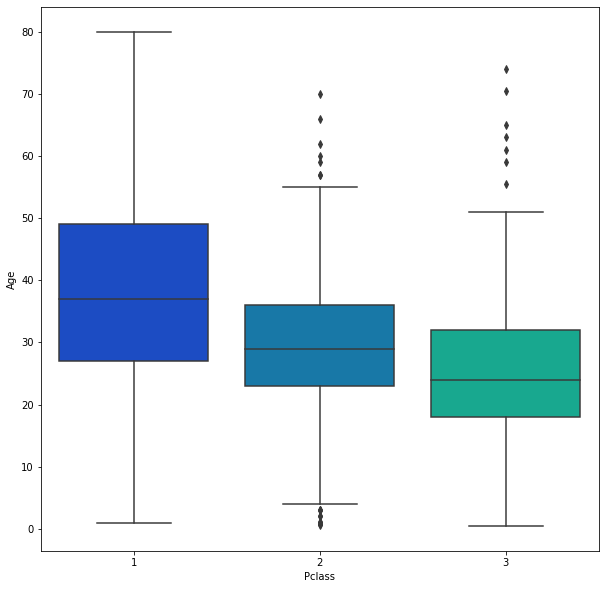

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Pclass', y='Age', data = train, palette='winter')

We will replace age value for that specific Passenger class with mean of that same Passenger class 

In [ ]:
def impute(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [ ]:
train['Age'] = train[['Age', 'Pclass']].apply(impute, axis=1)

In [ ]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Dropping the 2 missing embarked rows as it is insignificant (<1% of data)

In [ ]:
train = train.dropna()

In [ ]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Encoding Categorical Data

Pclass, Sex, Embarked 

In [ ]:
data = pd.concat([train, test], axis = 0)

In [ ]:
train.shape

(889, 11)

In [ ]:
test.shape

(418, 10)

In [ ]:
sex = pd.get_dummies(data['Embarked'], drop_first=True)
embarked = pd.get_dummies(data['Sex'], drop_first=True)
pclass = pd.get_dummies(data['Pclass'], drop_first=True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
data = data.drop(['Sex', 'Pclass', 'Embarked', 'Name', 'Ticket'], axis = 1)

In [ ]:
data.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare
0,1,0.0,22.0,1,0,7.2500
1,2,1.0,38.0,1,0,71.2833
2,3,1.0,26.0,0,0,7.9250
3,4,1.0,35.0,1,0,53.1000
4,5,0.0,35.0,0,0,8.0500


In [ ]:
data = pd.concat([data, sex, embarked, pclass], axis=1)

In [ ]:
data.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Q,S,male,2,3
0,1,0.0,22.0,1,0,7.2500,0,1,1,0,1
1,2,1.0,38.0,1,0,71.2833,0,0,0,0,0
2,3,1.0,26.0,0,0,7.9250,0,1,0,0,1
3,4,1.0,35.0,1,0,53.1000,0,1,0,0,0
4,5,0.0,35.0,0,0,8.0500,0,1,1,0,1


In [ ]:
data.shape

(1307, 11)

In [ ]:
train = data.iloc[0:889, :]
train.shape

(889, 11)

In [ ]:
test = data.iloc[889:, :]
test.shape

(418, 11)

In [ ]:
test.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Q,S,male,2,3
0,892,NaN,34.5,0,0,7.8292,1,0,1,0,1
1,893,NaN,47.0,1,0,7.0000,0,1,0,0,1
2,894,NaN,62.0,0,0,9.6875,1,0,1,1,0
3,895,NaN,27.0,0,0,8.6625,0,1,1,0,1
4,896,NaN,22.0,1,1,12.2875,0,1,0,0,1


In [ ]:
test = test.drop(['Survived'], axis = 1)
test = test.dropna()

In [ ]:
test.isnull().sum()

PassengerId    0
Age            0
SibSp          0
Parch          0
Fare           0
Q              0
S              0
male           0
2              0
3              0
dtype: int64

In [ ]:
y_train = np.array(train['Survived'])
X_train = np.array(train.drop(['Survived'], axis = 1))

In [ ]:
X_test = np.array(test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

cl = DecisionTreeClassifier()

cl.fit(X_train, y_train)

y_pred = cl.predict(X_test)

In [ ]:
%%time

from sklearn.model_selection import GridSearchCV

parameters = [{'criterion': ['gini', 'entropy']}]

grid_search = GridSearchCV(estimator = cl, param_grid = parameters, scoring = 'accuracy', cv = 5, n_jobs= -1)

# Using the full dataset (train + test) since we have validation set ...

grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_

best_parameters = grid_search.best_params_

print(f"Best Accuracy : {best_accuracy}")

print(f" Best Parameters : ")

print(best_parameters)

Best Accuracy : 0.7492414143337778
 Best Parameters : 
{'criterion': 'gini'}
CPU times: user 34.4 ms, sys: 994 µs, total: 35.4 ms
Wall time: 90 ms


In [ ]:
from sklearn.ensemble import RandomForestClassifier

cl = RandomForestClassifier()
    
cl.fit(X_train, y_train)

parameters = [{'criterion': ['gini', 'entropy'], 'n_estimators': [100, 125], 'verbose':[1]}]

# , 'max_features': ['sqrt', 'log2']

grid_search = GridSearchCV(estimator = cl, param_grid = parameters, scoring = 'accuracy', cv = 5, n_jobs= -1)

# Using the full dataset (train + test) since we have validation set ...

grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_

best_parameters = grid_search.best_params_

print(f"Best Accuracy : {best_accuracy}")

print(f" Best Parameters : ")

print(best_parameters)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Accuracy : 0.8065384371230877
 Best Parameters : 
{'criterion': 'gini', 'n_estimators': 125, 'verbose': 1}


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.2s finished
